In [1]:
import pandas as pd
import numpy as np
import heapq

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
up_or_down = 'down' # or down
all_data = pd.read_csv('./train_{}_Y.csv'.format(up_or_down))
all_data = all_data.drop(index = [71, 91, 48, 53, 72], axis = 0).reset_index(drop = True)
all_data.head()

,Nr.,spindle_speed,ap,fz,Ra_down,vbs,clamp_t1,clamp_t2,clamp_t3,clamp_t4,...,robot_f3,robot_f4,robot_f5,robot_f6,robot_f7,robot_f8,robot_f9,robot_f10,robot_f11,robot_f12
0,1,8000,0.2,0.050,12.83250,800,23.664093,30.291592,38.393060,0.157371,...,26.626340,37.272351,0.714372,35.315052,1.556639,3.491796,0.292318,4.725242,22.863227,14.646465
1,2,8000,0.2,0.065,6.47625,1040,28.025455,42.629657,50.951992,0.093461,...,28.416174,38.046999,0.746870,34.685676,1.406537,4.046528,0.297497,4.710575,25.495338,31.313131
2,3,8000,0.2,0.075,8.42100,1200,24.258964,50.996085,56.380290,-0.173644,...,27.344078,36.935515,0.740319,37.291320,1.594047,3.366703,0.252297,5.029516,37.602301,31.313131
3,4,8000,0.2,0.100,6.81600,1600,23.584906,64.358146,68.429443,-0.279162,...,26.456561,38.614400,0.685148,44.495306,2.046909,2.439704,0.198213,5.496787,39.944840,5.050505
4,5,8000,0.4,0.050,12.51250,800,43.182927,35.104902,55.606742,-0.126873,...,27.792608,38.519354,0.721523,37.829485,1.602961,3.331278,0.255970,4.810222,33.502295,6.060606


In [3]:
all_data.columns

Index(['Nr.', 'spindle_speed', 'ap', 'fz', 'Ra_down', 'vbs', 'clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7',
       'clamp_t8', 'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4', 'robot_t5',
       'robot_t6', 'robot_t7', 'robot_t8', 'clamp_f1', 'clamp_f2', 'clamp_f3',
       'clamp_f4', 'clamp_f5', 'clamp_f6', 'clamp_f7', 'clamp_f8', 'clamp_f9',
       'clamp_f10', 'clamp_f11', 'clamp_f12', 'robot_f1', 'robot_f2',
       'robot_f3', 'robot_f4', 'robot_f5', 'robot_f6', 'robot_f7', 'robot_f8',
       'robot_f9', 'robot_f10', 'robot_f11', 'robot_f12'],
      dtype='object')

In [4]:
used_feature = ['spindle_speed', 'ap', 'fz','vbs', 'clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7',
       'clamp_t8', 'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4', 'robot_t5',
       'robot_t6', 'robot_t7', 'robot_t8' ]

In [5]:
# select_top_num = 20
# #  # compute top 20 feature index
# max_num_index_list = list(map(person_coeff.index, heapq.nlargest(select_top_num, person_coeff)))

# #  # select column name in max_num_index_list
# selected_feature = []
# selected_feature_value = []
# for i in max_num_index_list:
#     selected_feature.append(used_feature[i])
#     selected_feature_value.append(person_coeff[i])

In [6]:
# selected_feature

In [7]:
# def plotPerson(list_value, list_name , num = 20, fig_size = (40, 20)):
#     feature_imp = pd.DataFrame({'Value': list_value,'Feature': list_name})
#     plt.figure(figsize=fig_size)
#     sns.set(font_scale = 5)
#     sns.barplot(x="Value", y="Feature", data = feature_imp.sort_values(by = "Value", 
#                 ascending = False)[0:num])
#     plt.title('LightGBM Features')
#     plt.tight_layout()
# #     plt.savefig('lgbm_importances-01.png')
#     plt.show()
#     return feature_imp

In [8]:
# plotPerson(selected_feature_value, selected_feature, num = select_top_num)

In [9]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error

X = all_data[used_feature] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = all_data['Ra_{}'.format(up_or_down)]


from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test= train_test_split(X, Y,test_size = 0.2, random_state = 50, shuffle = True)


In [10]:
x_train.columns

Index(['spindle_speed', 'ap', 'fz', 'vbs', 'clamp_t1', 'clamp_t2', 'clamp_t3',
       'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7', 'clamp_t8', 'robot_t1',
       'robot_t2', 'robot_t3', 'robot_t4', 'robot_t5', 'robot_t6', 'robot_t7',
       'robot_t8'],
      dtype='object')

In [11]:
pip install lightgbm

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(boosting_type = 'gbdt', max_depth = 6, 
                      objective = 'rmse', random_state = 5, learning_rate = 0.1, 
                     n_estimators = 2000, colsample_bytree = 0.8, subsample = 0.8)

# lgbm.fit(X, y)

lgbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        eval_metric = 'rmse',
        early_stopping_rounds = 30)

# output valid set rmse in each iteration

[1]	valid_0's rmse: 2.26676
[2]	valid_0's rmse: 2.15125
[3]	valid_0's rmse: 2.07694
[4]	valid_0's rmse: 2.0053
[5]	valid_0's rmse: 1.9118
[6]	valid_0's rmse: 1.83306
[7]	valid_0's rmse: 1.76858
[8]	valid_0's rmse: 1.72043
[9]	valid_0's rmse: 1.67173
[10]	valid_0's rmse: 1.62974
[11]	valid_0's rmse: 1.60572
[12]	valid_0's rmse: 1.57463
[13]	valid_0's rmse: 1.5622
[14]	valid_0's rmse: 1.52735
[15]	valid_0's rmse: 1.50661
[16]	valid_0's rmse: 1.48875
[17]	valid_0's rmse: 1.48263
[18]	valid_0's rmse: 1.46831
[19]	valid_0's rmse: 1.46266
[20]	valid_0's rmse: 1.45158
[21]	valid_0's rmse: 1.42665
[22]	valid_0's rmse: 1.41797
[23]	valid_0's rmse: 1.41087
[24]	valid_0's rmse: 1.39121
[25]	valid_0's rmse: 1.3725
[26]	valid_0's rmse: 1.36816
[27]	valid_0's rmse: 1.36303
[28]	valid_0's rmse: 1.34692
[29]	valid_0's rmse: 1.34552
[30]	valid_0's rmse: 1.32863
[31]	valid_0's rmse: 1.31418
[32]	valid_0's rmse: 1.3114
[33]	valid_0's rmse: 1.31157
[34]	valid_0's rmse: 1.30019
[35]	valid_0's rmse: 1.3024


/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMRegressor(colsample_bytree=0.8, max_depth=6, n_estimators=2000,
              objective='rmse', random_state=5, subsample=0.8)

In [13]:
# predict test data
y_pred = lgbm.predict(x_test)

# predict train data
y_fit = lgbm.predict(x_train)

In [14]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred, squared = False))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

print('mean squared error: %.2f'
      %mean_squared_error(y_test,y_pred))
print('mean_absolute_percentage_error:%.2f'
      %mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 0.98
Coefficient of determination: 0.83
mean squared error: 0.96
mean_absolute_percentage_error:0.12


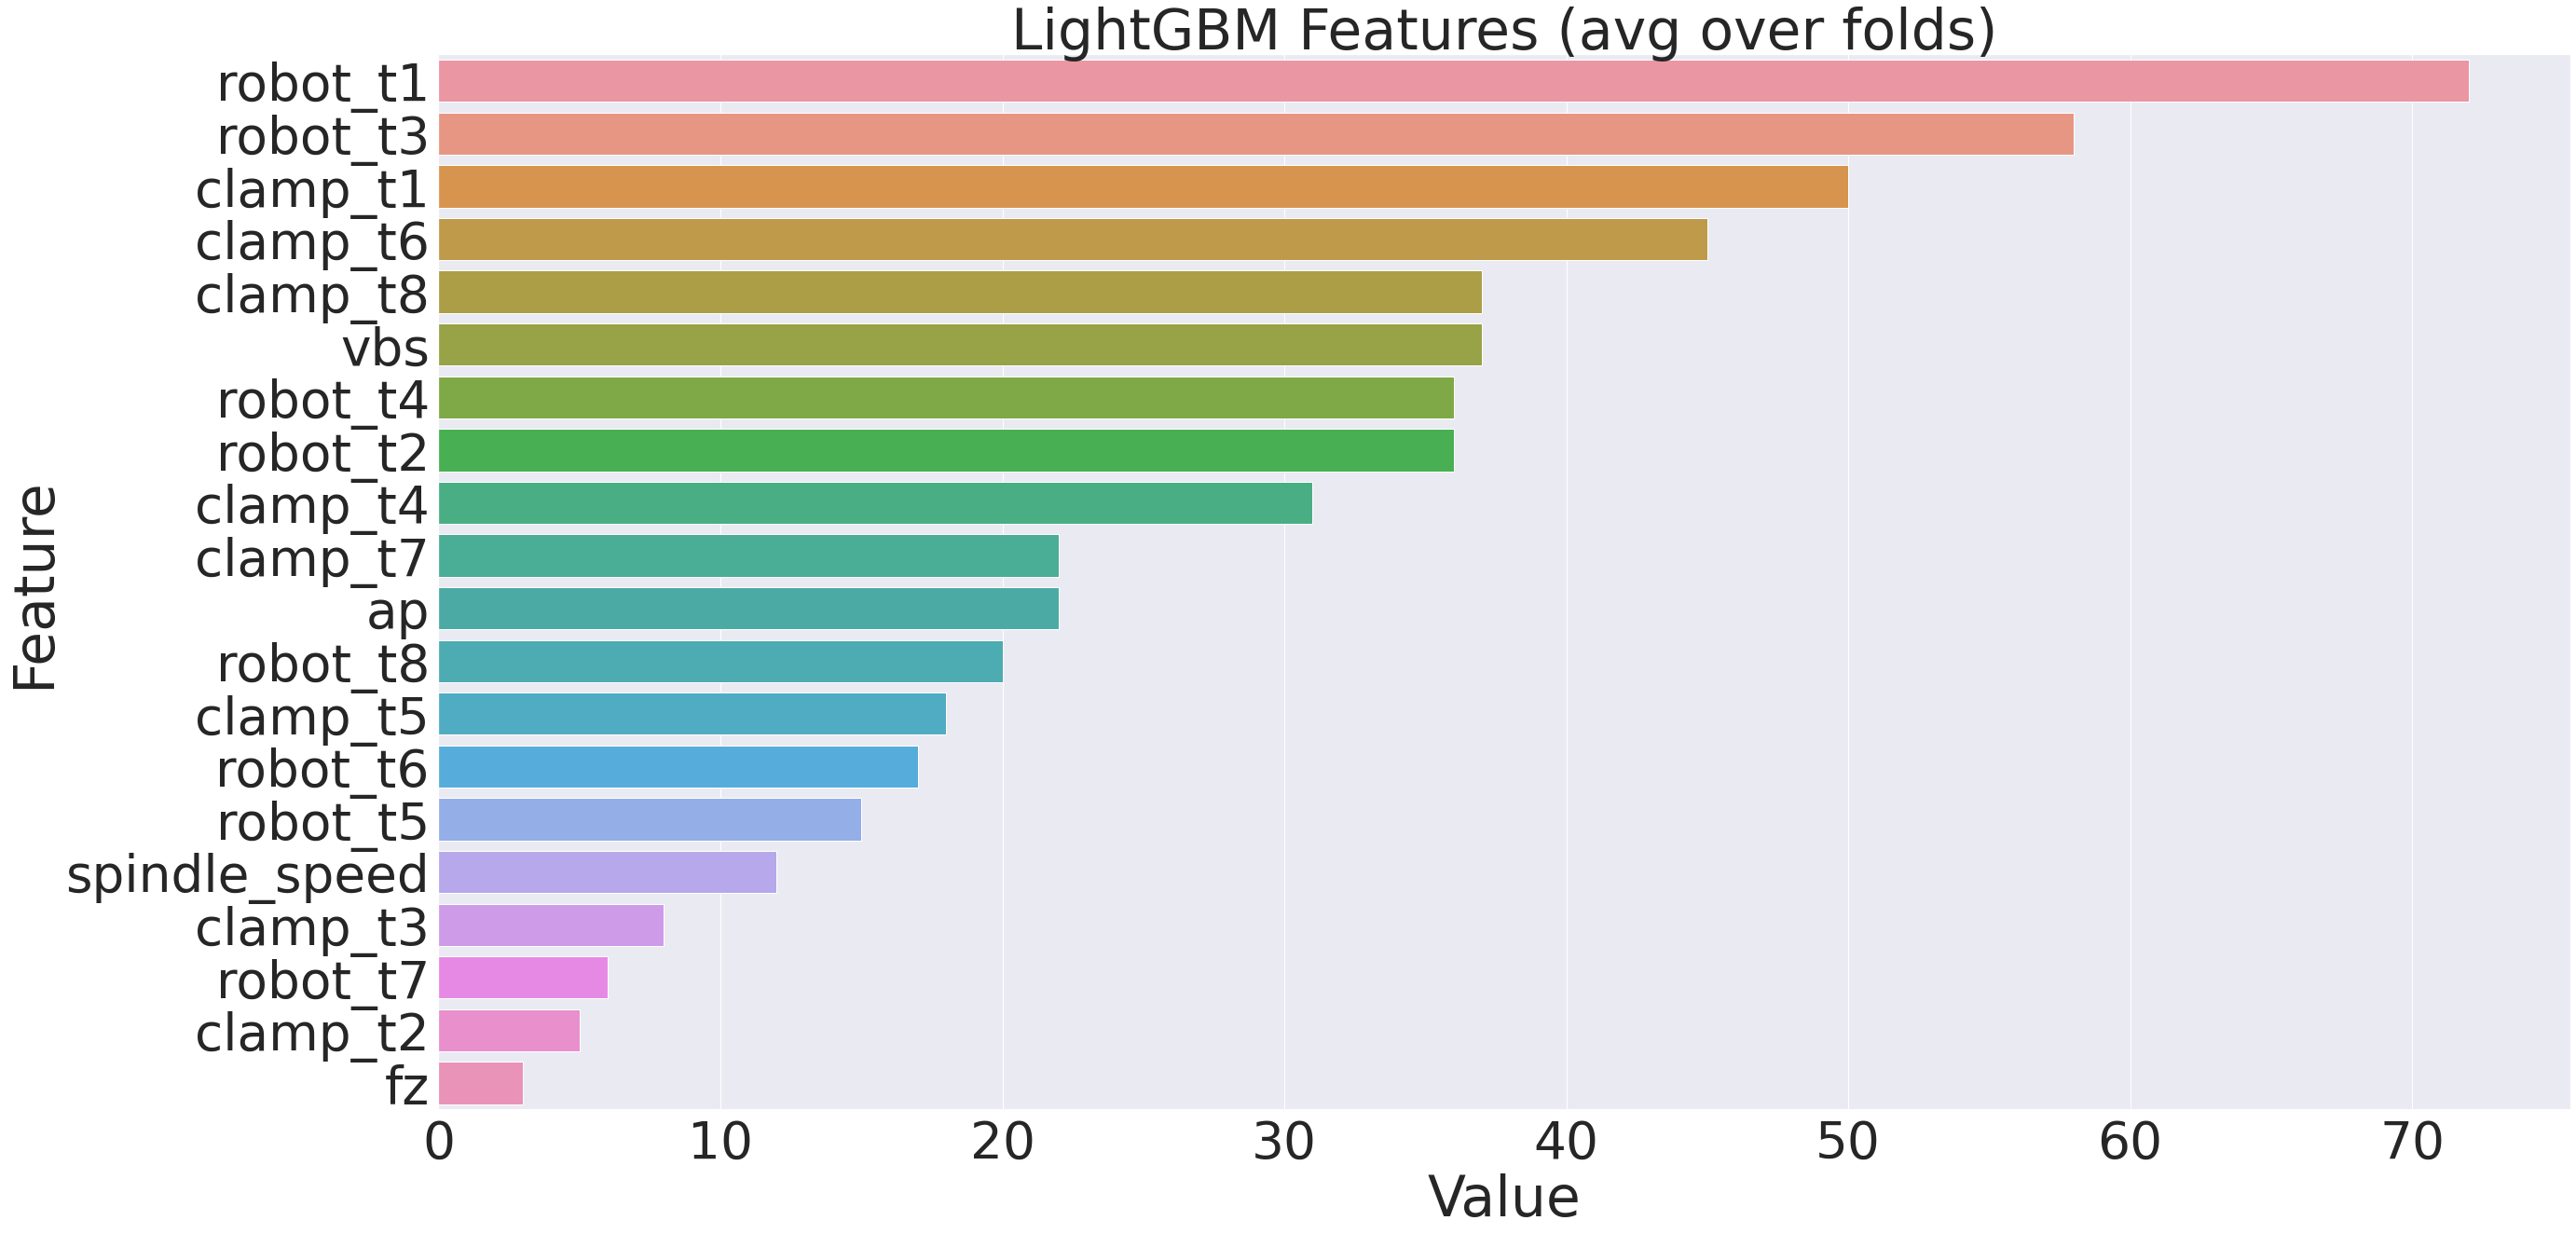

In [15]:
select_feature_num = 20
def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize = fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data = feature_imp.sort_values(by = "Value", 
                                                        ascending = False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
#     plt.savefig('lgbm_importances-01.png')
    plt.show()
    return feature_imp

feature_imp = plotImp(lgbm, x_train, num = select_feature_num)

In [16]:
# top 20 important feature 
# 20
top20_feature_bytree = list(feature_imp.sort_values(by = "Value", ascending = False)[:select_feature_num]['Feature'])

In [17]:
top20_feature_bytree

['robot_t1',
 'robot_t3',
 'clamp_t1',
 'clamp_t6',
 'clamp_t8',
 'vbs',
 'robot_t4',
 'robot_t2',
 'clamp_t4',
 'clamp_t7',
 'ap',
 'robot_t8',
 'clamp_t5',
 'robot_t6',
 'robot_t5',
 'spindle_speed',
 'clamp_t3',
 'robot_t7',
 'clamp_t2',
 'fz']

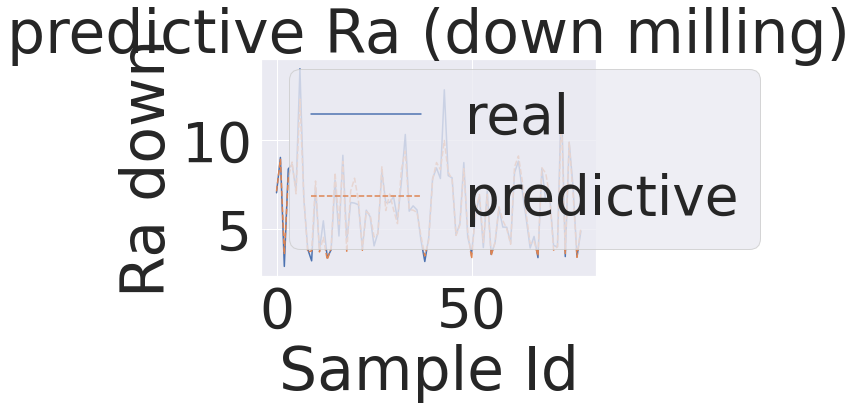

In [18]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer = True)

# plt.figure(figsize = (5, 5))
# sns.set(font_scale = 0.1)
plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

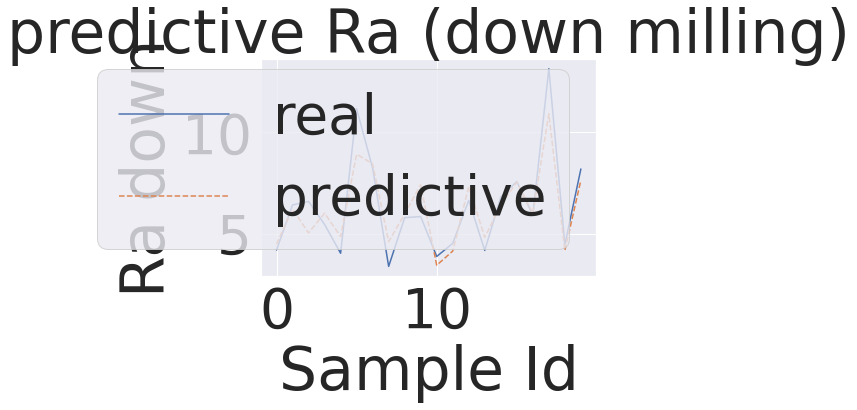

In [19]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()